# SagarKumar Thummar

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from scipy.stats import norm
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Lab#2 Enterprise/brca.csv")

In [4]:
df

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


In [5]:
df.columns

Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

# Exploratory Data Analysis
## Check missing values

In [6]:
df.isnull().sum()

Unnamed: 0             0
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [7]:
np.round((df.isnull().sum()/len(df)*100).sort_values(ascending=False),2)

Unnamed: 0             0.0
x.radius_mean          0.0
x.fractal_dim_worst    0.0
x.symmetry_worst       0.0
x.concave_pts_worst    0.0
x.concavity_worst      0.0
x.compactness_worst    0.0
x.smoothness_worst     0.0
x.area_worst           0.0
x.perimeter_worst      0.0
x.texture_worst        0.0
x.radius_worst         0.0
x.fractal_dim_se       0.0
x.symmetry_se          0.0
x.concave_pts_se       0.0
x.concavity_se         0.0
x.compactness_se       0.0
x.smoothness_se        0.0
x.area_se              0.0
x.perimeter_se         0.0
x.texture_se           0.0
x.radius_se            0.0
x.fractal_dim_mean     0.0
x.symmetry_mean        0.0
x.concave_pts_mean     0.0
x.concavity_mean       0.0
x.compactness_mean     0.0
x.smoothness_mean      0.0
x.area_mean            0.0
x.perimeter_mean       0.0
x.texture_mean         0.0
y                      0.0
dtype: float64

# Drop column- 'Unnamed'  
- we drop the column because it is not necessary.

In [8]:
df.drop(['Unnamed: 0'], axis = 1 , inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

# Examine the dataset's columns for skewness.
- The validity of the assumptions made by statistical tests and models can be impacted by skewness, which is a measure of a distribution's asymmetry.


In [10]:
df.skew()

x.radius_mean          0.942380
x.texture_mean         0.650450
x.perimeter_mean       0.990650
x.area_mean            1.645732
x.smoothness_mean      0.456324
x.compactness_mean     1.190123
x.concavity_mean       1.401180
x.concave_pts_mean     1.171180
x.symmetry_mean        0.725609
x.fractal_dim_mean     1.304489
x.radius_se            3.088612
x.texture_se           1.646444
x.perimeter_se         3.443615
x.area_se              5.447186
x.smoothness_se        2.314450
x.compactness_se       1.902221
x.concavity_se         5.110463
x.concave_pts_se       1.444678
x.symmetry_se          2.195133
x.fractal_dim_se       3.923969
x.radius_worst         1.103115
x.texture_worst        0.498321
x.perimeter_worst      1.128164
x.area_worst           1.859373
x.smoothness_worst     0.415426
x.compactness_worst    1.473555
x.concavity_worst      1.150237
x.concave_pts_worst    0.492616
x.symmetry_worst       1.433928
x.fractal_dim_worst    1.662579
dtype: float64

In [11]:
# Change the "y" columns name.
df = df.rename(columns={"y": "diagnosis"})


In [12]:
# df
df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,diagnosis
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


Text(0.5, 0.98, 'Correlation Matrix')

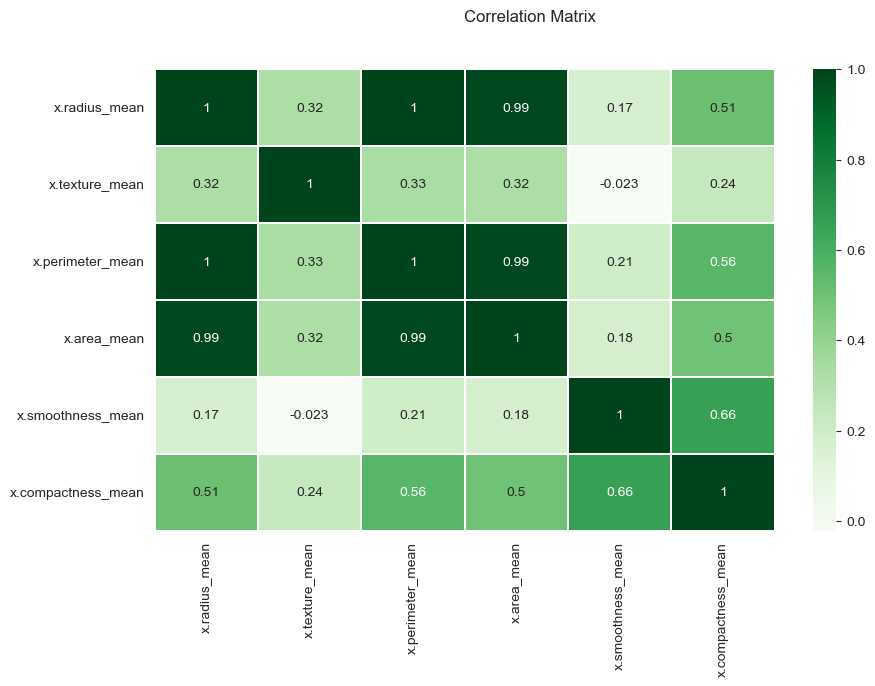

In [13]:
#create the correlation matrix heat map
plt.figure(figsize=(10,6))
sns.heatmap(df[[df.columns[0], df.columns[1],df.columns[2],df.columns[3],
                     df.columns[4], df.columns[5]]].corr(),linewidths=.1,cmap="Greens", annot=True)
plt.yticks(rotation=0);
plt.suptitle('Correlation Matrix')

# Observation:
Only a few variables in the dataset have strong correlations with one another, such as:
- x.radius_mean is strongly correlated with x.area_mean and x.perimeter_mean.

but others like:
- x.smoothness_mean variable's correlation with x.texture_mean variables in the dataset is weak.

This provides more evidence for the earlier analysis that there are numerous variables that are heavily skewed, which causes inaccurate analysis and predictions.

# Verify the target variable's distribution for the diagnosis.

Text(0.5, 1.0, 'Distribution of Diagnosis')

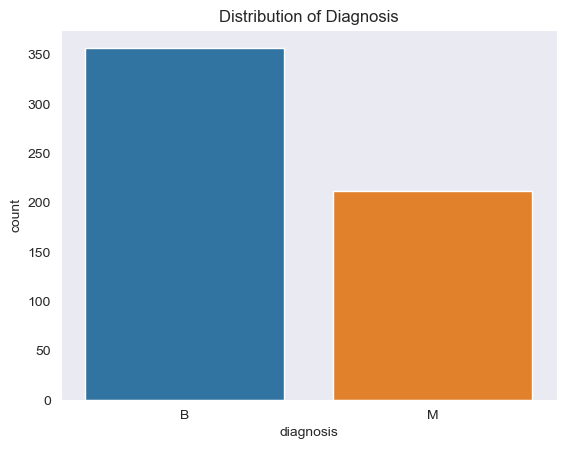

In [14]:
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')

## A boxplot:

Text(0.5, 1.0, 'Boxplot of Radius Mean by Diagnosis')

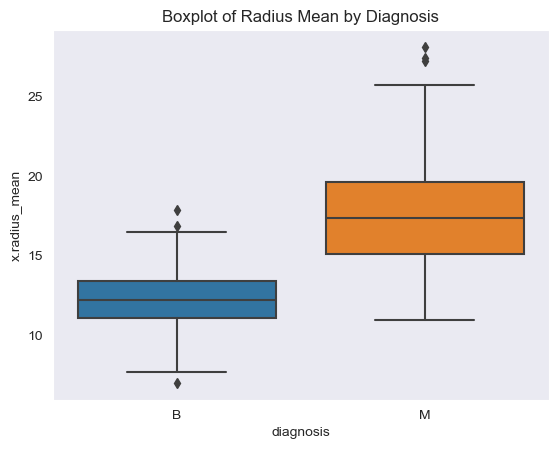

In [15]:
sns.boxplot(x='diagnosis', y='x.radius_mean', data=df)
plt.title('Boxplot of Radius Mean by Diagnosis')

# Data Preprocessing:

### 1. Encoding
- Transform the 'M' and 'B' values (target variable) to 1 and 0 respectively. 


In [16]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [17]:
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,diagnosis
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


### 2. Normalization
- to keep on scalling the numerical features. We will apply the MinMax scalling method in this case.

In [18]:
scaler =MinMaxScaler(feature_range=(0, 1))
scaled_data =  pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_data

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,diagnosis
0,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,0.162174,...,0.192964,0.245480,0.129276,0.480948,0.145540,0.190895,0.442612,0.278336,0.115112,0.0
1,0.288655,0.202908,0.289130,0.159703,0.495351,0.330102,0.107029,0.154573,0.458081,0.382266,...,0.225746,0.227501,0.109443,0.396421,0.242852,0.150958,0.250275,0.319141,0.175718,0.0
2,0.119409,0.092323,0.114367,0.055313,0.449309,0.139685,0.069260,0.103181,0.381313,0.402064,...,0.097015,0.073310,0.031877,0.404345,0.084903,0.070823,0.213986,0.174453,0.148826,0.0
3,0.286289,0.294555,0.268261,0.161315,0.335831,0.056070,0.060028,0.145278,0.205556,0.182603,...,0.287580,0.169580,0.088650,0.170640,0.018337,0.038602,0.172268,0.083185,0.043618,0.0
4,0.057504,0.241123,0.054730,0.024772,0.301255,0.122845,0.037207,0.029409,0.358081,0.317397,...,0.264925,0.034115,0.014009,0.386515,0.105180,0.054952,0.088110,0.303568,0.124951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.659709,0.520122,0.685578,0.510498,0.517017,0.626403,0.743674,0.732604,0.550000,0.396588,...,0.463486,0.640918,0.401543,0.459156,0.379651,0.527077,0.873540,0.268874,0.286567,1.0
565,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,1.0
566,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,1.0
567,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,1.0


# Obsertvation:
- As a normalisation technique, min-max scaling reduces all of a dataset's values to a range between 0 and 1. This is accomplished by dividing each value by the dataset's range after removing the dataset's minimum value from each value (the difference between the maximum and minimum values).

#### Why this technique was used with this dataset
- used the Min-Max scaling method because it preserves the relative distances between data points and is particularly helpful for skewed data because it does not assume that the data follows a particular distribution.

#  Classification Algorithm

### splitting the dataset into training and testing sets

In [19]:
X = scaled_data.loc[:, scaled_data.columns != 'diagnosis']
y = scaled_data['diagnosis']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Build the ANN model
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_dim=X_train_scaled.shape[1]))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
15/15 [==============================] - 1s 3ms/step - loss: 0.6707 - accuracy: 0.6286
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6286
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5870 - accuracy: 0.6308
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.6747
Epoch 5/10
15/15 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7912
Epoch 6/10
15/15 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.8791
Epoch 7/10
15/15 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.9143
Epoch 8/10
15/15 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.9341
Epoch 9/10
15/15 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.9363
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9298
Test Loss: 0.25454977

# Conclusion

### The model had an accuracy of 92.98% according to the Breast Cancer Classification Model Evaluation. This shows that the model has a high level of accuracy in classifying breast cancer cases.
### A high accuracy score of 92.98% indicates that the model is good at differentiating between benign and malignant breast cancer cases. This is a great outcome because it illustrates the model's ability to aid in proper diagnosis.
